<a href="https://colab.research.google.com/github/AshwiniKalamkar/Bike-Sharing-demand-prediction-project/blob/main/Bike_Sharing_demand_prediction_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Project Title : Seoul Bike Sharing Demand Prediction***

## **Github link **

https://github.com/AshwiniKalamkar/Bike-Sharing-demand-prediction-project



# **Problem Description**
    
   1) Currently Rental bikes are introduced in many urban cities for the    enhancement of mobility comfort. 

  2)  It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. 

  3)  Eventually, providing the city with a stable supply of rental bikes becomes a major concern. 

   4) The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

#   **Data Description**
**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

# **Attribute Information:**
1) Date : year-month-day

2) Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day

3)Temperature-Temperature in Celsius

4) Humidity - %

5) Windspeed - m/s

6) Visibility - 10m

7) Dew point temperature - Celsius

8) Solar radiation - MJ/m2

9) Rainfall - mm

10) Snowfall - cm

11) Seasons - Winter, Spring, Summer, Autumn

12) Holiday - Holiday/No holiday

13) Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)
      

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from math import sqrt
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

bike_sharing_df =pd.read_csv('/content/drive/MyDrive/capstone project 2/SeoulBikeData.csv',encoding ='latin')

In [5]:
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
bike_sharing_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
bike_sharing_df.shape

(8760, 14)

In [9]:
bike_sharing_df.describe

<bound method NDFrame.describe of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°

In [10]:
bike_sharing_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# duplicate
len(bike_sharing_df[bike_sharing_df.duplicated()])


0

# **Exploratory Data Analysis**

In [13]:
categorical_features= ['Seasons', 'Holiday', 'Functioning Day']
categorical_features


['Seasons', 'Holiday', 'Functioning Day']

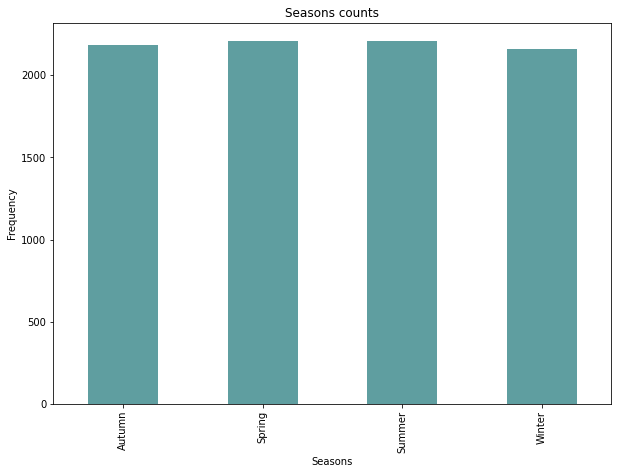

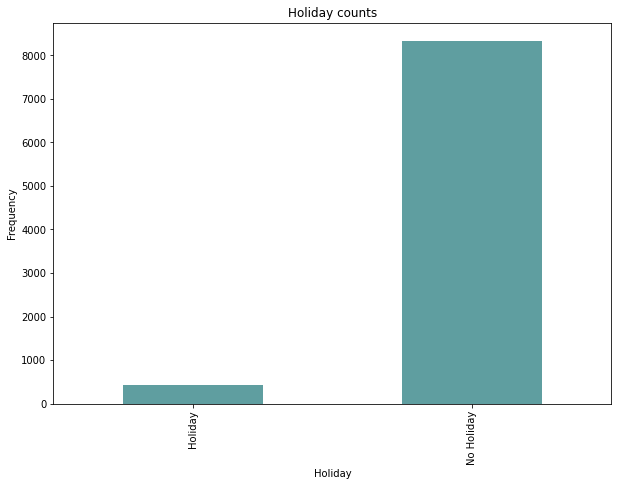

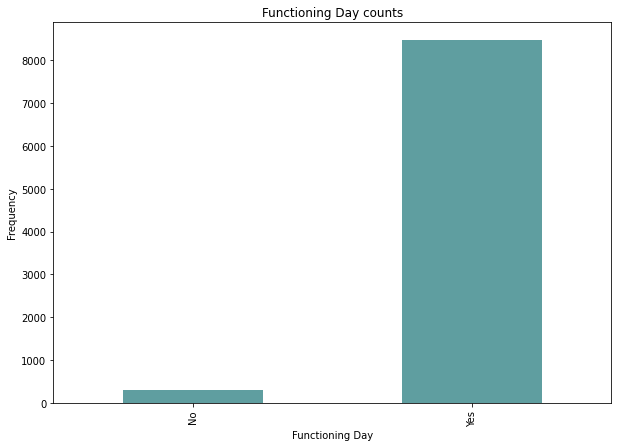

In [14]:
for col in categorical_features:
    counts = bike_sharing_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='CadetBlue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

## ** Dependent variable 'Appliances'**
  
  Dependent Variables: 1) The variables which depend on other variables or factors.
  
  2)  We expect these variables to change when the independent variables, upon whom they depend, undergo a change. 
  
  3) They are the presumed effect.
 

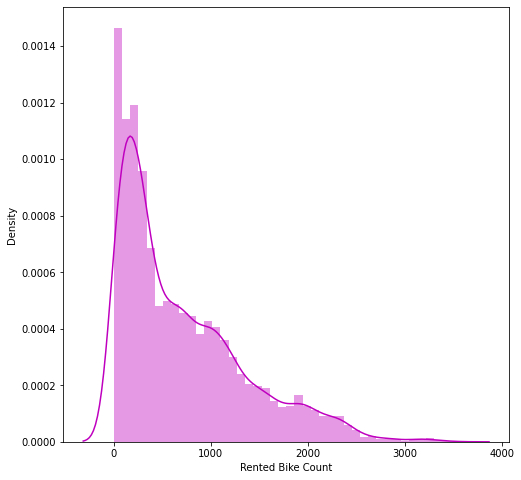

In [15]:
# Dependent variable 'Appliances'
plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Rented Bike Count'],color="m")

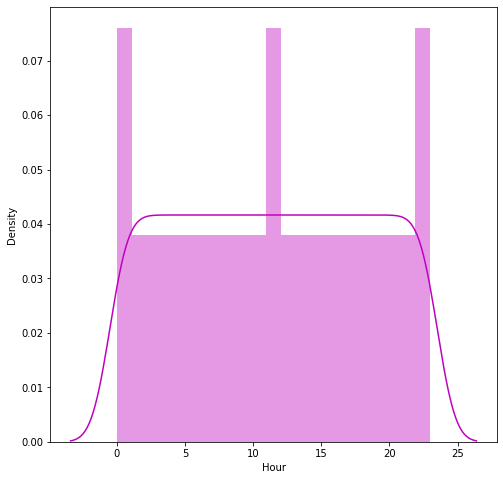

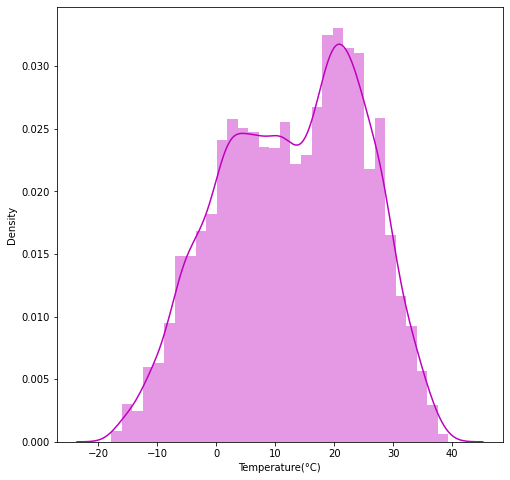

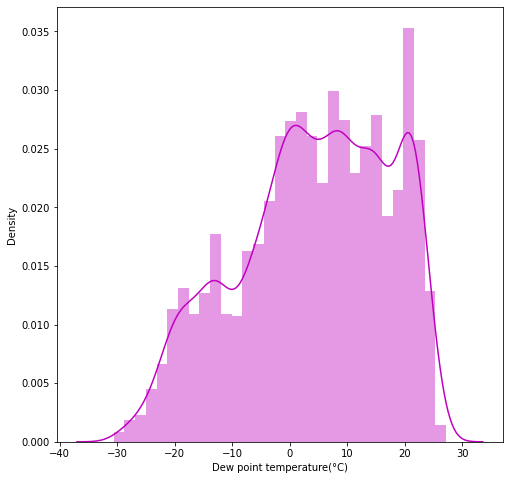

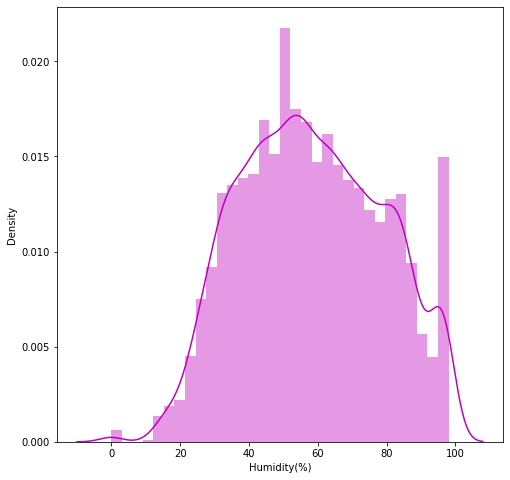

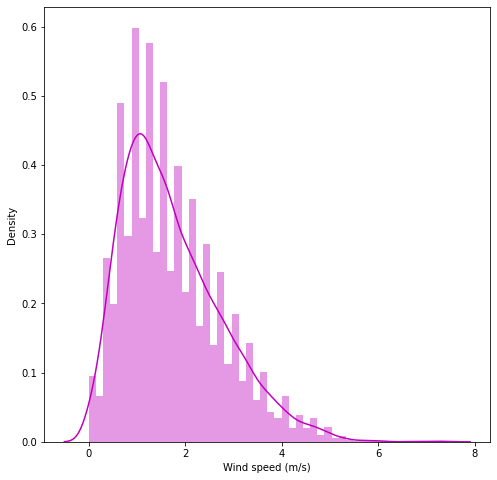

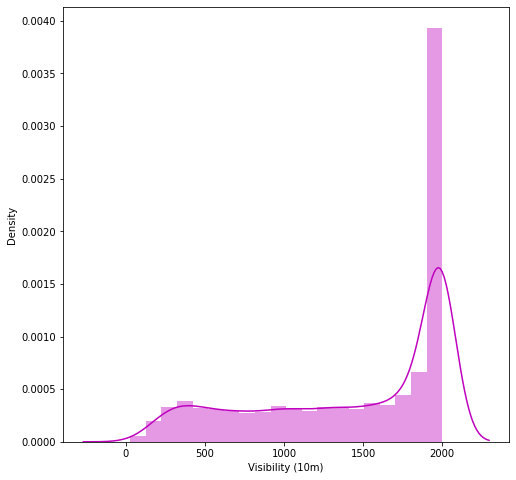

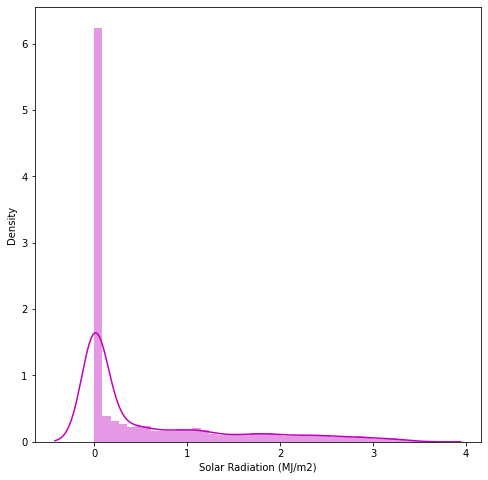

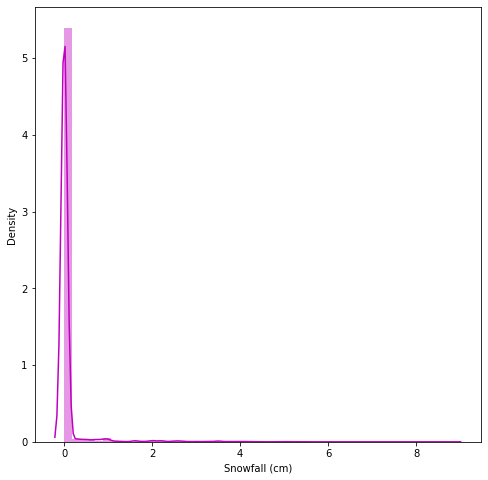

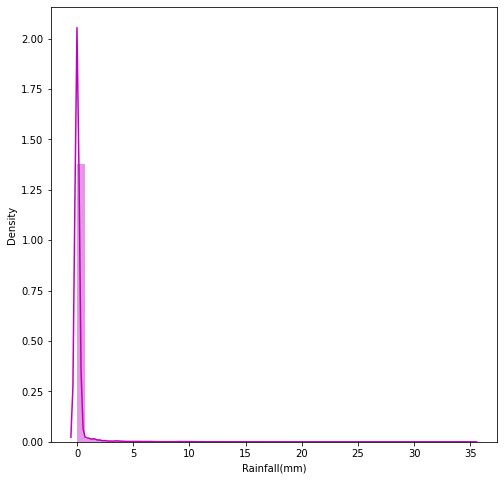

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Hour'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Temperature(°C)'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Dew point temperature(°C)'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Humidity(%)'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Wind speed (m/s)'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Visibility (10m)'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Solar Radiation (MJ/m2)'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Snowfall (cm)'],color="m")

plt.figure(figsize=(8,8))
sns.distplot(bike_sharing_df['Rainfall(mm)'],color="m")


1) Bike sharing is at its peak between 4pm- 6pm

2) Bike shaing is least between 4am-6am.

3) Most preferred temperature for bike renting is 20-30 Degree Celcius.

4) Bike sharing is least when temperatur is < 5 and >35 Degree Celcius.

5) Humidity of 40%-60% is most favourable for bike sharing.

6) Wind speed of 1m/s -2 m/s is most favourable for bike sharing.

7) Bike sharing count is directly related to Visbility in the area.

8) Dew Point Temperature of 5-25 Degree Celcius is most favourable for bike sharing.

9) Optimum Solar Radiation, no rainfall and no snowfall leads to higher bike renting in Seoul.

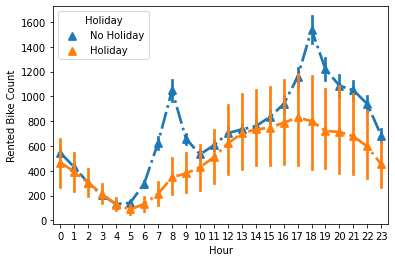

In [ ]:
sns.pointplot(x = "Hour",
              y = "Rented Bike Count",
              linestyles = '-.',
              markers = '^',
              hue = "Holiday",
              data = bike_sharing_df)
plt.show()

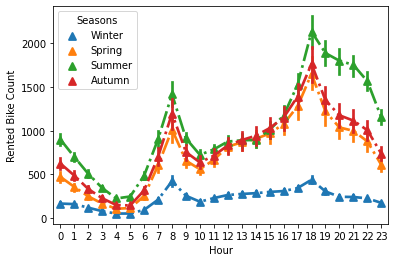

In [ ]:
sns.pointplot(x = "Hour",
              y = "Rented Bike Count",
              linestyles = '-.',
              markers = '^',
              hue = "Seasons",
              data = bike_sharing_df)
plt.show()

In [ ]:

# Date columns to Date format conversion

bike_sharing_df['Date']= pd.to_datetime(bike_sharing_df['Date'])

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

bike_sharing_df['Date']=pd.to_datetime(bike_sharing_df['Date'])
bike_sharing_df['month'] = bike_sharing_df['Date'].apply(lambda x : x.month)
bike_sharing_df['day_of_week'] = bike_sharing_df['Date'].dt.day_name()
bike_sharing_df['weekdays_weekend']=bike_sharing_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_sharing_df=bike_sharing_df.drop(columns=['Date','day_of_week'],axis=1)

## **correlation using heatmap**

1) Correlation Heat map is a two dimensional plot of the amount of correlation (measure of dependence) between variables represented by colors. 

2)The varying intensity of color represents the measure of correlation.

 3)Correlation is a measure of linear relationship between two variables.

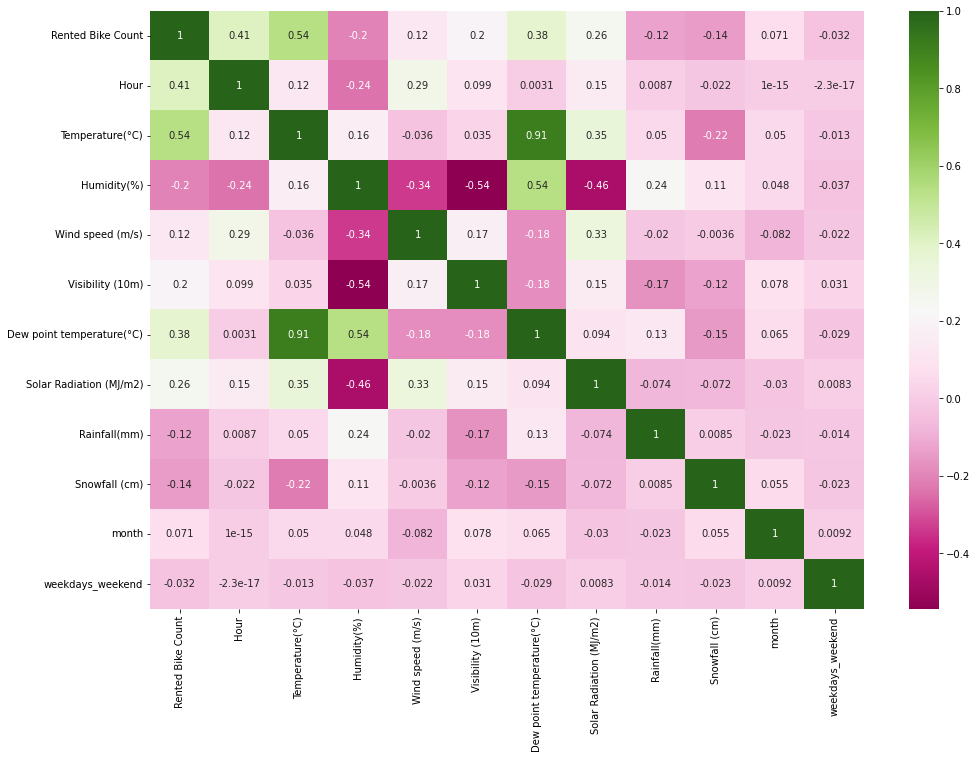

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(16,11))
sns.heatmap(bike_sharing_df.corr(),cmap='PiYG',annot=True)

1) Heat map shows slightly postive relation of Rented bike count with Hour, Temperature,Dew point Temperature, Solar Radiaton

2) Bike sharing count is negatively co-related to Humidity, Snowfall, Rainfall

3) Temperature and Dew point temperature are positively co-related.

## ** Multicollinearity**

1) Multicollinearity Analysis in Machine Learning Multicollinearity (also known as collinearity) is a statistical phenomenon in which one feature variable in a regression model has a high linear correlation with another feature variable. 

2)When two or more variables are perfectly correlated, this is referred to as collinearity.

In [ ]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(bike_sharing_df[[i for i in bike_sharing_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


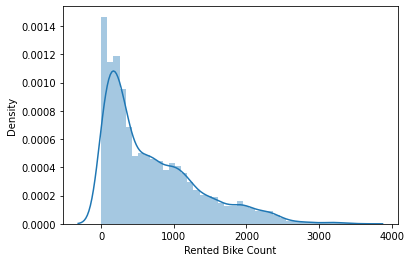

In [ ]:
#visualising distribution

sns.distplot(bike_sharing_df['Rented Bike Count'])

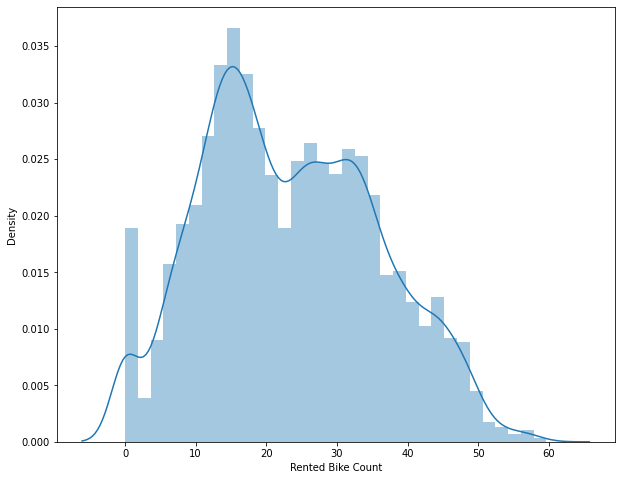

In [ ]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(bike_sharing_df['Rented Bike Count']))

In [ ]:
# Numeric Features

numeric_features= bike_sharing_df.select_dtypes(exclude='object')

## **plotting histogram**

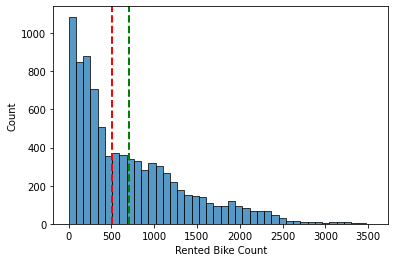

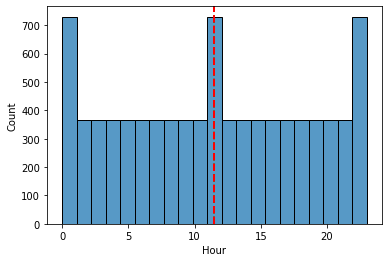

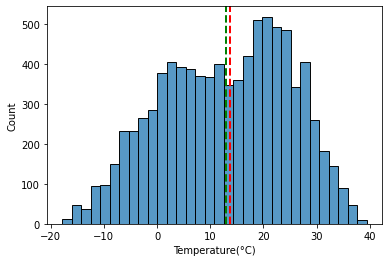

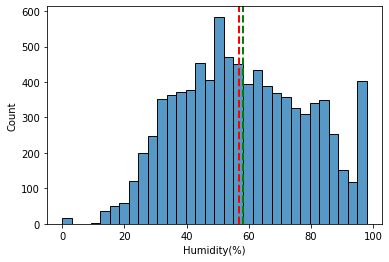

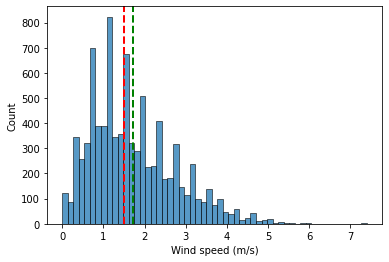

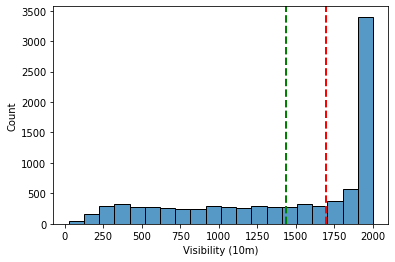

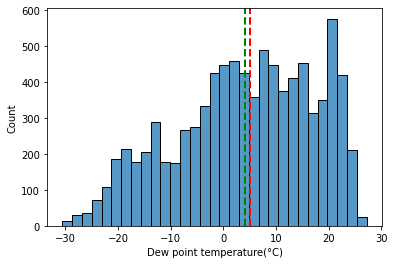

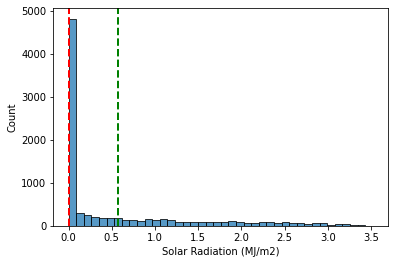

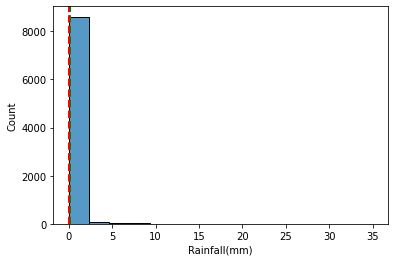

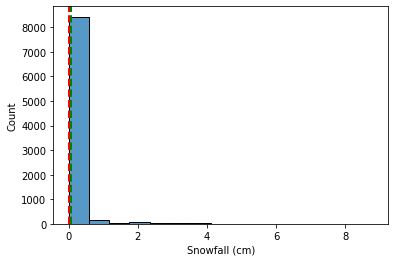

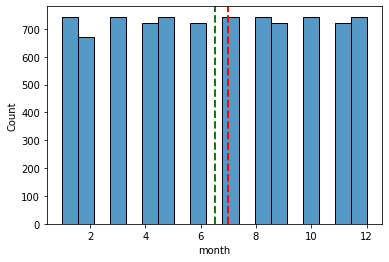

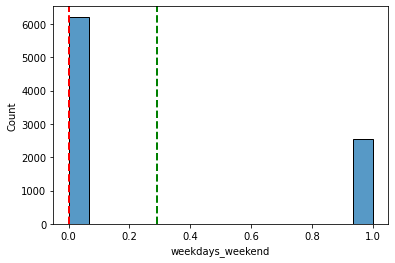

In [ ]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(bike_sharing_df[col])
  plt.axvline(bike_sharing_df[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(bike_sharing_df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()


## **correlation**

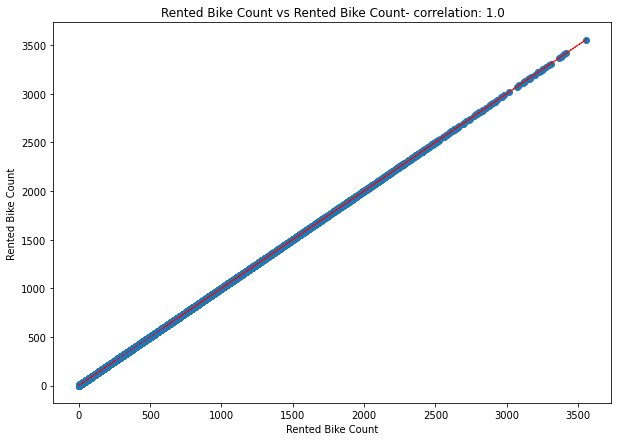

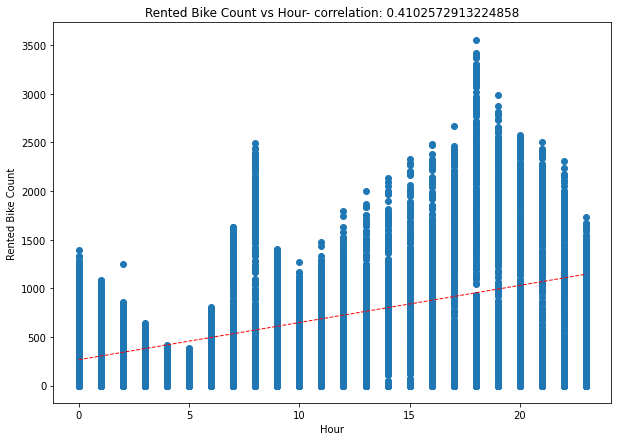

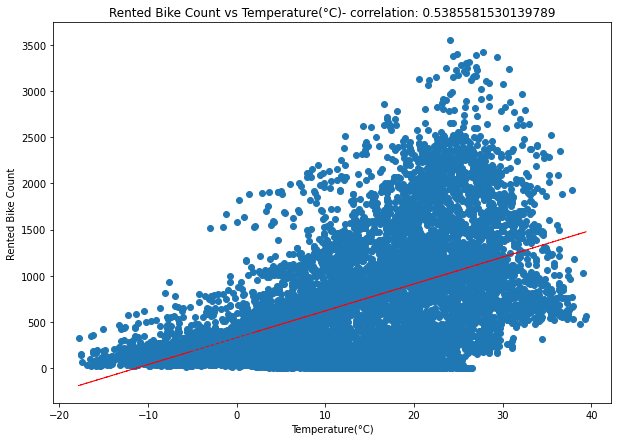

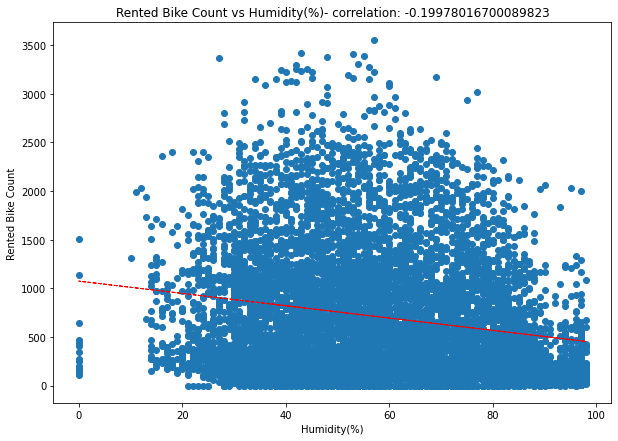

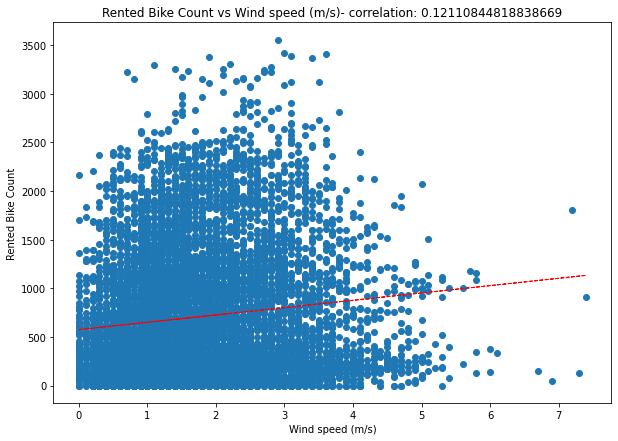

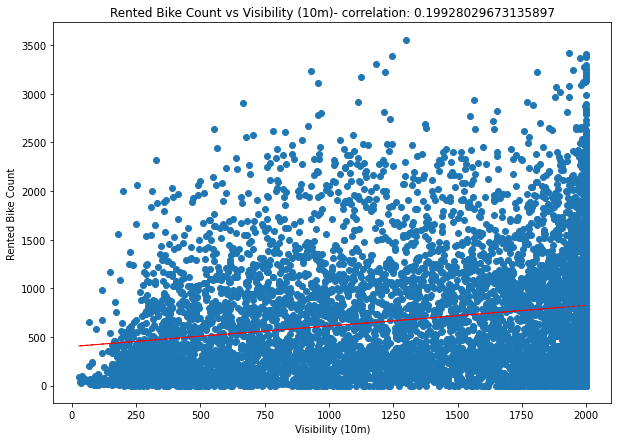

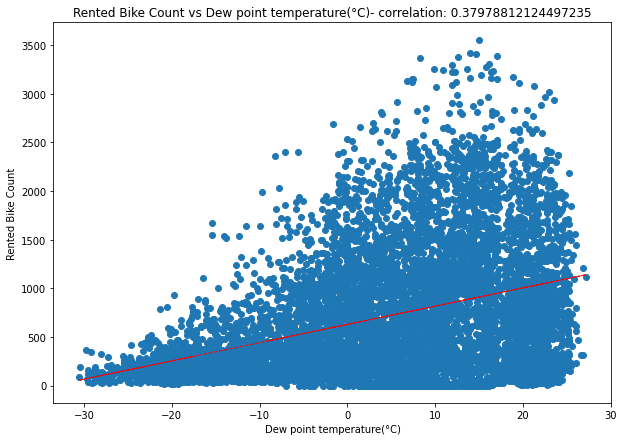

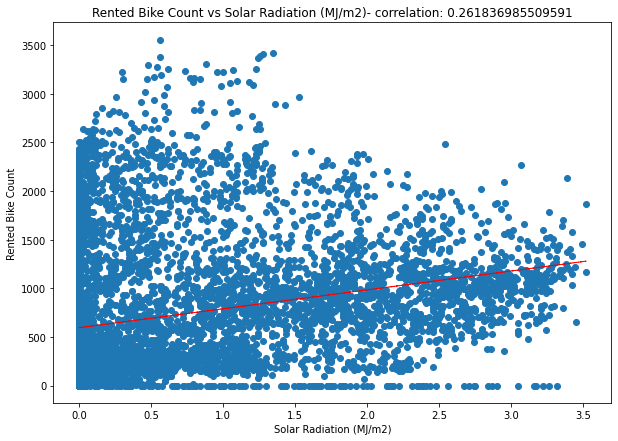

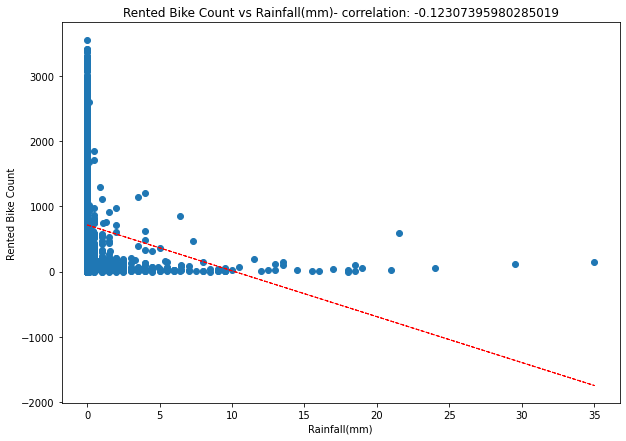

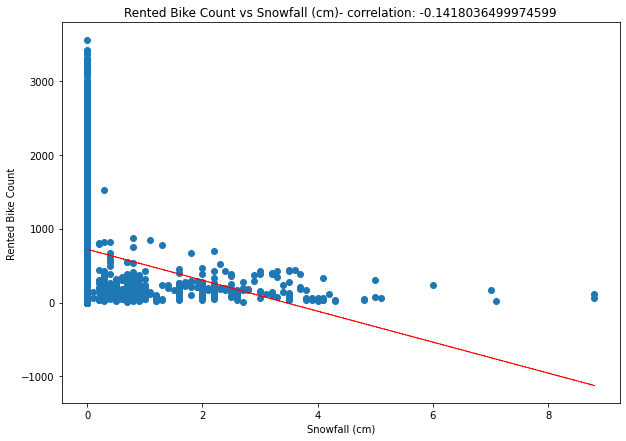

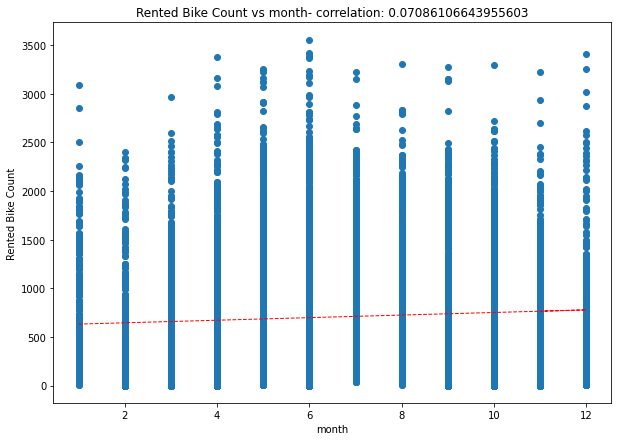

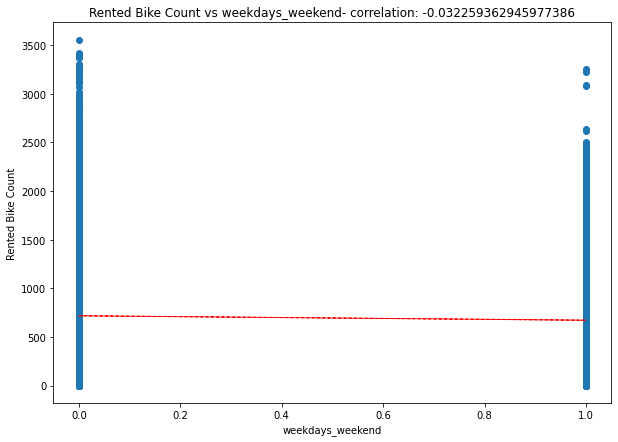

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = bike_sharing_df[col]
    label = bike_sharing_df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_sharing_df[col], bike_sharing_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bike_sharing_df[col])

    plt.plot(bike_sharing_df[col], y_hat, "r--", lw=1)

plt.show()

1) Bike sharing count is positively co- related to Hour as the Hours Progress from 0 (12 am) to 20 (8pm) the bike sharing count increases.

2) Bike sharing is positively co-related to tempearature as the temperature approaches 30*C.

3) Though one thing to notice the positive co-relation is applicable only because temp is Seoul rarely crosses 40 Degress

4) Humidity, Snowfall, Rainfall, are negatively co-related to Bike rent count.

5) Solar radiation and Dew Point temperatuer are slightly positively realted to Bike sharing count.

## **Outliers**

In [ ]:
#Extracting categorical features
categorical_features= bike_sharing_df.select_dtypes(include='object')

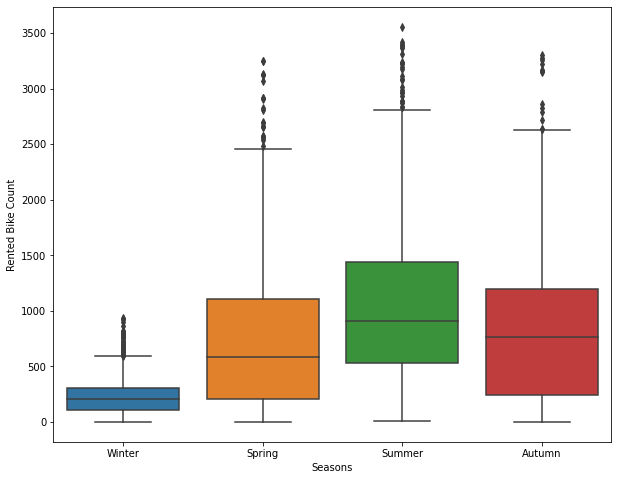

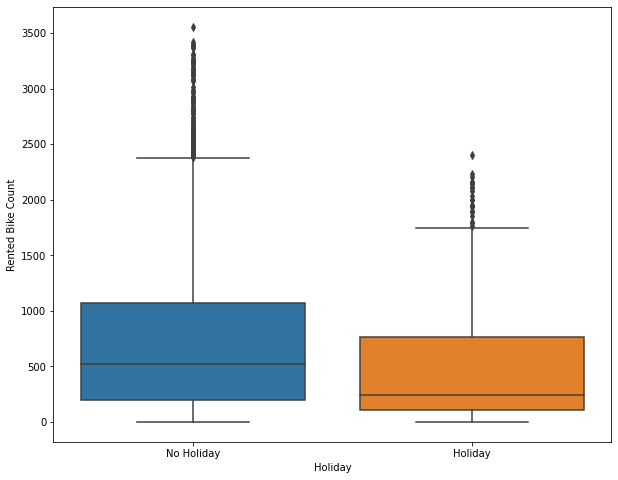

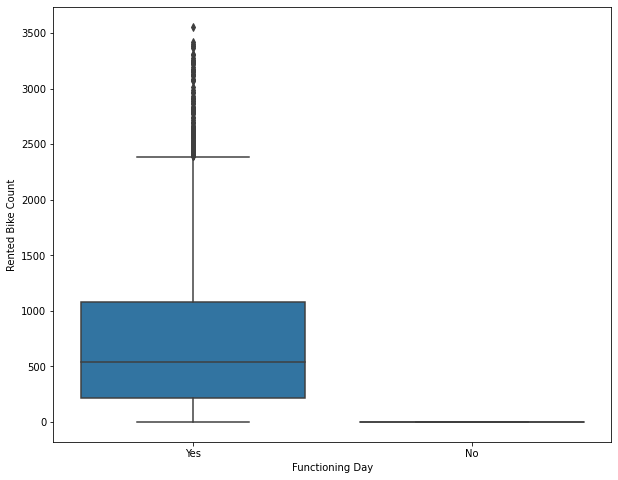

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=bike_sharing_df[col],y=bike_sharing_df["Rented Bike Count"])
  plt.show()

1) Most number of Bikes are rented in Summer, followed by Autumn and Spring and Winter

2) People prefer booking bikes on Working days more than the Holidays

3) All the bikes were rented on the functioning day

In [ ]:
#checking counts of seasons
bike_sharing_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#checking counts of holiday
bike_sharing_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
#checking counts of functioning day
bike_sharing_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

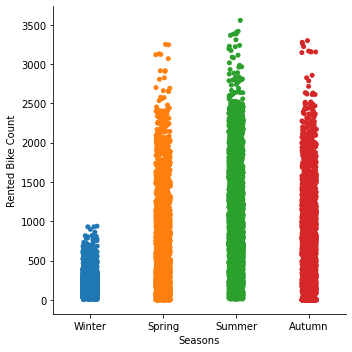

In [ ]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=bike_sharing_df)

## **line graph**

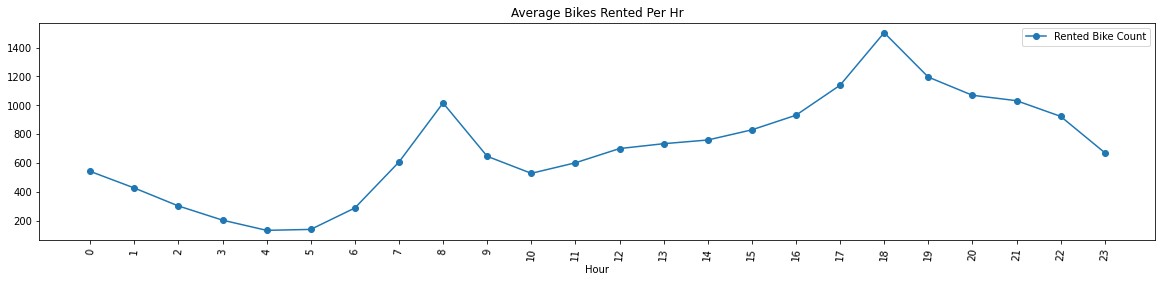

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data=bike_sharing_df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

<Figure size 2000x1600 with 0 Axes>

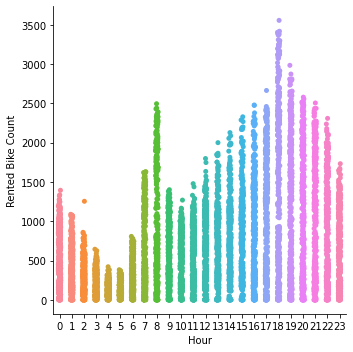

<Figure size 2000x1600 with 0 Axes>

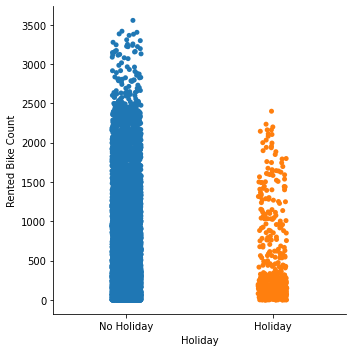

<Figure size 2000x1600 with 0 Axes>

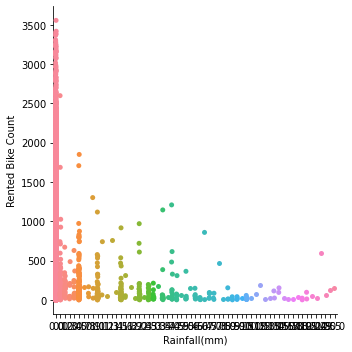

<Figure size 2000x1600 with 0 Axes>

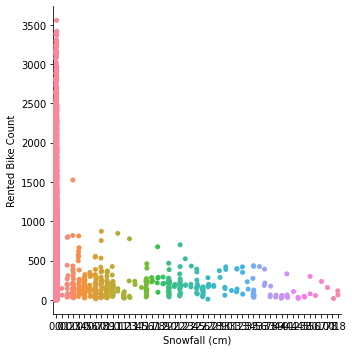

<Figure size 2000x1600 with 0 Axes>

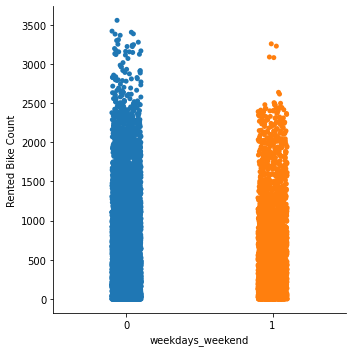

In [ ]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=bike_sharing_df)
  plt.show()

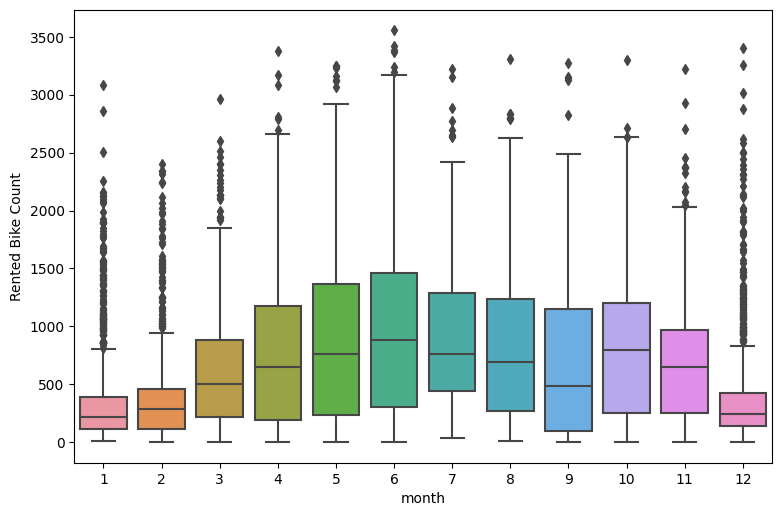

In [ ]:
plt.figure(figsize=(9,6),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=bike_sharing_df)
plt.show()

## **one hot encoding**

1) One-hot encoding is used in machine learning as a method to quantify categorical data. 

2) In short, this method produces a vector with length equal to the number of categories in the data set. 


# ** dummy variables**
1) If there are n number of categories in categorical attribute, n new attributes will be created. These attributes created are called Dummy Variables. 

2)These dummy variables will be created with one hot encoding and each attribute will have value either 0 or 1, representing presence or absence of that attribute.

3)We use dummy variables in Regression in Machine Learning. 


In [ ]:
#One hot encoding
bike_sharing_df_pr = pd.get_dummies(bike_sharing_df, columns=["Seasons", "Holiday","Functioning Day"], prefix=["body", "etype","fsystem"], drop_first=True)

In [ ]:
bike_sharing_df_pr.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend,body_Spring,body_Summer,body_Winter,etype_No Holiday,fsystem_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,0,1,1,1


In [ ]:
feature=['Hour',	'Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)', 'body_Winter', 'etype_No Holiday', 'fsystem_Yes']

In [ ]:
# x is independent variables and y is dependent variables
from scipy.stats import zscore
x= bike_sharing_df_pr[feature].apply(zscore)
y= bike_sharing_df_pr['Rented Bike Count']

In [ ]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2)
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132


## **Train test split**

## **Linear Regression**

   1) linear regression model assumes that the relationship between the dependent variable and independent is linear. 
 
   2) This relationship is modeled through a disturbance term or error variable ε — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable. 
  
  3) Thus the model takes the form Regression is done on numerical data which is continuous. 
 
   4) Linear regression consist of dependent and independent variables related linear to each other our basic aim is to create best fit line from the dependent and independent variable between two axis, it is expressed in straight line

   
  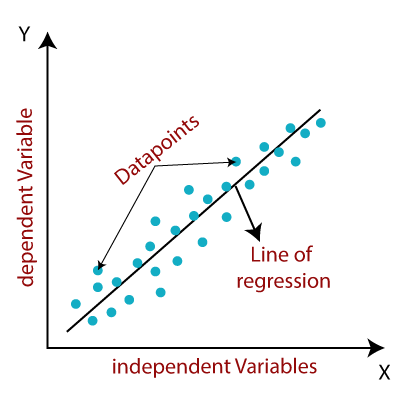


In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(7008, 10)
(1752, 10)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.5357996567315244

In [ ]:
reg.coef_

array([ 191.82069155,   91.02678925, -260.30812225,   10.50846049,
         19.96635597,  222.56576121,  -62.51736748, -135.34043616,
         22.60969384,  155.79102049])

In [ ]:
reg.intercept_

708.5031361690557

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([ 467.06762274,  653.9137921 ,  445.1758746 , ...,  236.44080136,
       1108.69403827,  432.35367117])

In [ ]:
# Predicting and Calculating the Metrices for Prediction of Testing Dataset
prediction_test_lr = reg.predict(x_test)

r2_test_lr = r2_score(y_test, prediction_test_lr)
rms_test_lr = sqrt(mean_squared_error(y_test, prediction_test_lr))
mae_test_lr = mean_absolute_error(y_test,prediction_test_lr)
mape_test_lr = np.mean(np.abs((y_test - prediction_test_lr) / y_test)) * 100

# Predicting and Calculating the Metrices for Prediction of Training Dataset
prediction_train_lr = reg.predict(x_train)

r2_train_lr = r2_score(y_train, prediction_train_lr)
rms_train_lr = sqrt(mean_squared_error(y_train, prediction_train_lr))
mae_train_lr = mean_absolute_error(y_train,prediction_train_lr)
mape_train_lr = np.mean(np.abs((y_train - prediction_train_lr) / y_train)) * 100

In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_lr)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_lr)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_lr)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_lr)))
print('MAE for Training Data:',float("{0:.2f}".format(mae_train_lr)))
print('MAE for Testing Data:',float("{0:.2f}".format(mae_test_lr)))
print('MAPE for Training Data:',float("{0:.2f}".format(mape_train_lr)))
print('MAPE for Testing Data:',float("{0:.2f}".format(mape_test_lr)))

R Squared for Training Data: 0.54
R Squared for Testing Data: 0.52
RMS for Training Data: 439.04
RMS for Testing Data: 447.49
MAE for Training Data: 328.6
MAE for Testing Data: 336.5
MAPE for Training Data: inf
MAPE for Testing Data: inf


## **Lasso regression**

(L1 Regularization)

1) It is a type of linear regression that used for shrinkage and to avoid overfitting in the data. 

2)To make the optimal solution we use penalty term in cost function and minimize the cost function from value is lambda * mag(Bij) and make final value become zero.

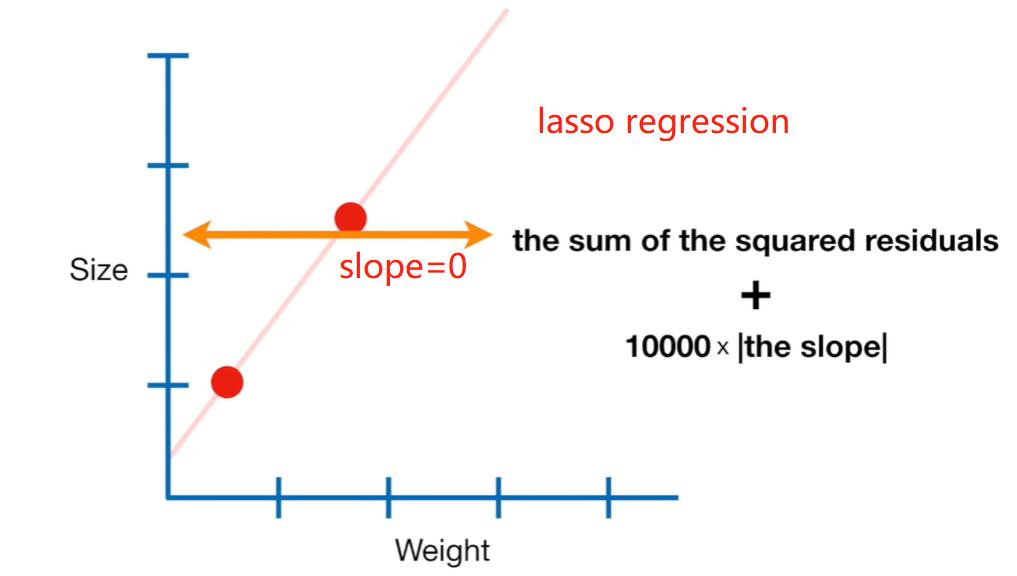

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.coef_

array([ 191.82063599,   91.03204008, -260.3053495 ,   10.50829345,
         19.96646374,  222.5594501 ,  -62.51717238, -135.34029762,
         22.60960533,  155.79089978])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -193483.14525213296


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)
y_pred_lasso1 = lasso_regressor.predict(x_train)

In [ ]:
r2_test = r2_score(y_test, y_pred_lasso)
rms_test = sqrt(mean_squared_error(y_test, y_pred_lasso))

r2_train = r2_score(y_train, y_pred_lasso1)
rms_train = sqrt(mean_squared_error(y_train, y_pred_lasso1))

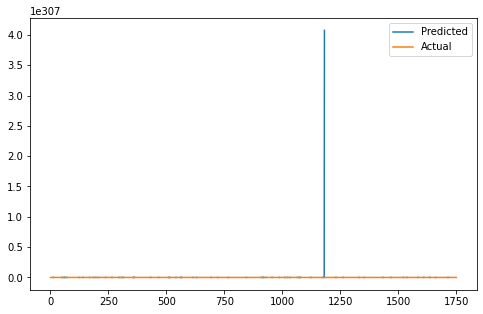

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test)))

R Squared for Training Data: 0.54
R Squared for Testing Data: 0.52
RMS for Training Data: 439.04
RMS for Testing Data: 447.47


## **Ridge regression**

(L2 Regularization)

1) This method performs L2 regularization. When the issue of least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

2)To make the optimal solution we use penalty term in cost function and minimize the cost function from the value is lambda * (Bij)2 and make final value close to zero and shrink the value.



In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -193377.2228201617


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge1 = ridge_regressor.predict(x_train)

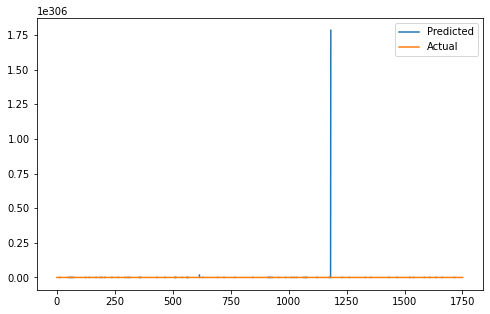

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
r2_test_ridge = r2_score(y_test, y_pred_ridge)
rms_test_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))

r2_train_ridge = r2_score(y_train, y_pred_ridge1)
rms_train_ridge = sqrt(mean_squared_error(y_train, y_pred_ridge1))

In [ ]:
print('R Squared for Training Data:',float("{0:.2f}".format(r2_train_ridge)))
print('R Squared for Testing Data:',float("{0:.2f}".format(r2_test_ridge)))
print('RMS for Training Data:',float("{0:.2f}".format(rms_train_ridge)))
print('RMS for Testing Data:',float("{0:.2f}".format(rms_test_ridge)))

R Squared for Training Data: 0.54
R Squared for Testing Data: 0.52
RMS for Training Data: 439.05
RMS for Testing Data: 447.43


## **Conclusions**

1) We train a model to predict the number of rented bike count in given weather conditions. 

2)First, we do Exploratory Data Analysis on the data set.

3) We look for null values that is not found in dataset and outliers and appropriately modify them. 

4)We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

5) High demand of bike at 8AM as the time of people for going to their work and 6PM time of returning to home.

6) Prefer more bikes in the morning.

7) Random forest will work best as we get r-squared 87%



• Season: We see highest number bike rentals in Summer Seasons and the lowest in Spring season.

• Weather: As one would expect, we see highest number of bike rentals on a clear day and the lowest on a snowy or rainy day.

• Humidity: With increasing humidity, we see decrease in the number of bike rental count.
